In [1]:
import matplotlib.pyplot as plt
import cv2

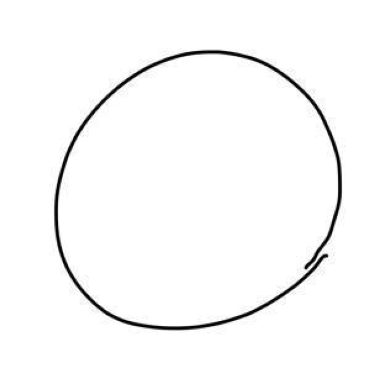

In [2]:
image = cv2.imread("./datasets/train/o_25.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

In [3]:
for i in range(300):
    print(image[i])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [4]:
image.shape

(300, 300)

In [5]:
import os

In [6]:
import torch.nn as nn
import torch
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [7]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            # 이미지 파일 읽기
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # 이미지 크기 조정 (300x300)
                img = cv2.resize(img, (300, 300))
                images.append(img)
                
                # 파일 이름에 따라 라벨 설정
                if 'O' in filename or 'o' in filename:
                    labels.append(0)
                elif 'X' in filename or 'x' in filename:
                    labels.append(1)
                else:
                    print(f"Warning: {filename} does not contain 'O' or 'X'")
    # 넘파이 배열로 변환 후 텐서로 변환
    images = np.array(images)
    labels = np.array(labels)
    
    # 이미지 배열 차원 조정 (N, 1, 300, 300)
    images = images[:, np.newaxis, :, :]
    
    return torch.tensor(images, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

In [8]:
# 데이터셋 폴더 경로 설정 (예: train_data 폴더)
train_folder = './datasets/train'
test_folder = './datasets/test'

# 전처리 함수 호출
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

In [9]:
X_train.shape

torch.Size([240, 1, 300, 300])

In [10]:
y_train.shape

torch.Size([240])

In [11]:
print(X_train.shape,
      y_train.shape)

torch.Size([240, 1, 300, 300]) torch.Size([240])


In [12]:
y_test.shape

torch.Size([40])

In [13]:
# TensorDataset 및 DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
next(iter(train_loader))

[tensor([[[[255., 254., 255.,  ..., 255., 255., 255.],
           [253., 181.,  67.,  ..., 255., 255., 255.],
           [255.,  26.,   0.,  ..., 255., 255., 255.],
           ...,
           [254., 255., 255.,  ..., 255., 255., 255.],
           [255., 254., 252.,  ..., 255., 255., 255.],
           [254., 255., 255.,  ..., 255., 255., 255.]]],
 
 
         [[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.]]],
 
 
         [[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
     

In [175]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten(start_dim=1)  # start_dim=1으로 설정
        self.fc1 = nn.Linear(300 * 300, 128)  # 입력 크기를 맞추기 위해 300*300으로 설정
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # 이진 분류를 위한 출력 노드 2개

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

In [176]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [177]:
# 훈련 함수 정의
def train(epoch):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

In [178]:
# 테스트 함수 정의
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

In [179]:
# 훈련 및 테스트 실행
num_epochs = 20
for epoch in range(num_epochs):
    train(epoch)
test()

Epoch [1/20], Loss: 2202.2005609571934
Epoch [2/20], Loss: 909.8118114471436
Epoch [3/20], Loss: 614.771981716156
Epoch [4/20], Loss: 564.7756824493408
Epoch [5/20], Loss: 143.69474053382874
Epoch [6/20], Loss: 117.46238565444946
Epoch [7/20], Loss: 131.85616852715611
Epoch [8/20], Loss: 194.83371096849442
Epoch [9/20], Loss: 231.99199545383453
Epoch [10/20], Loss: 263.4432210922241
Epoch [11/20], Loss: 185.81779065728188
Epoch [12/20], Loss: 120.25874900817871
Epoch [13/20], Loss: 83.44850540161133
Epoch [14/20], Loss: 63.909465074539185
Epoch [15/20], Loss: 18.215693831443787
Epoch [16/20], Loss: 23.534844517707825
Epoch [17/20], Loss: 17.613408386707306
Epoch [18/20], Loss: 24.03267014026642
Epoch [19/20], Loss: 34.74160432815552
Epoch [20/20], Loss: 14.020800739526749
Accuracy: 70.0%


In [180]:
# 모델 예측
with torch.no_grad():
    prediction = model(X_test.float())  # X_test를 float으로 변환하여 모델에 입력
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print(f'Prediction Accuracy: {accuracy.item() * 100}%')

Prediction Accuracy: 69.9999988079071%


In [181]:
def predict(model, data_loader):
    with torch.no_grad():
        model.eval()
        ret = None
        for img, files in data_loader:
            img = img
            pred = model(img)
            
            if ret is None:
                ret = pred.numpy()
            else:
                ret = np.vstack([ret, pred.numpy()])
    return ret
   
pred = predict(model, test_loader)

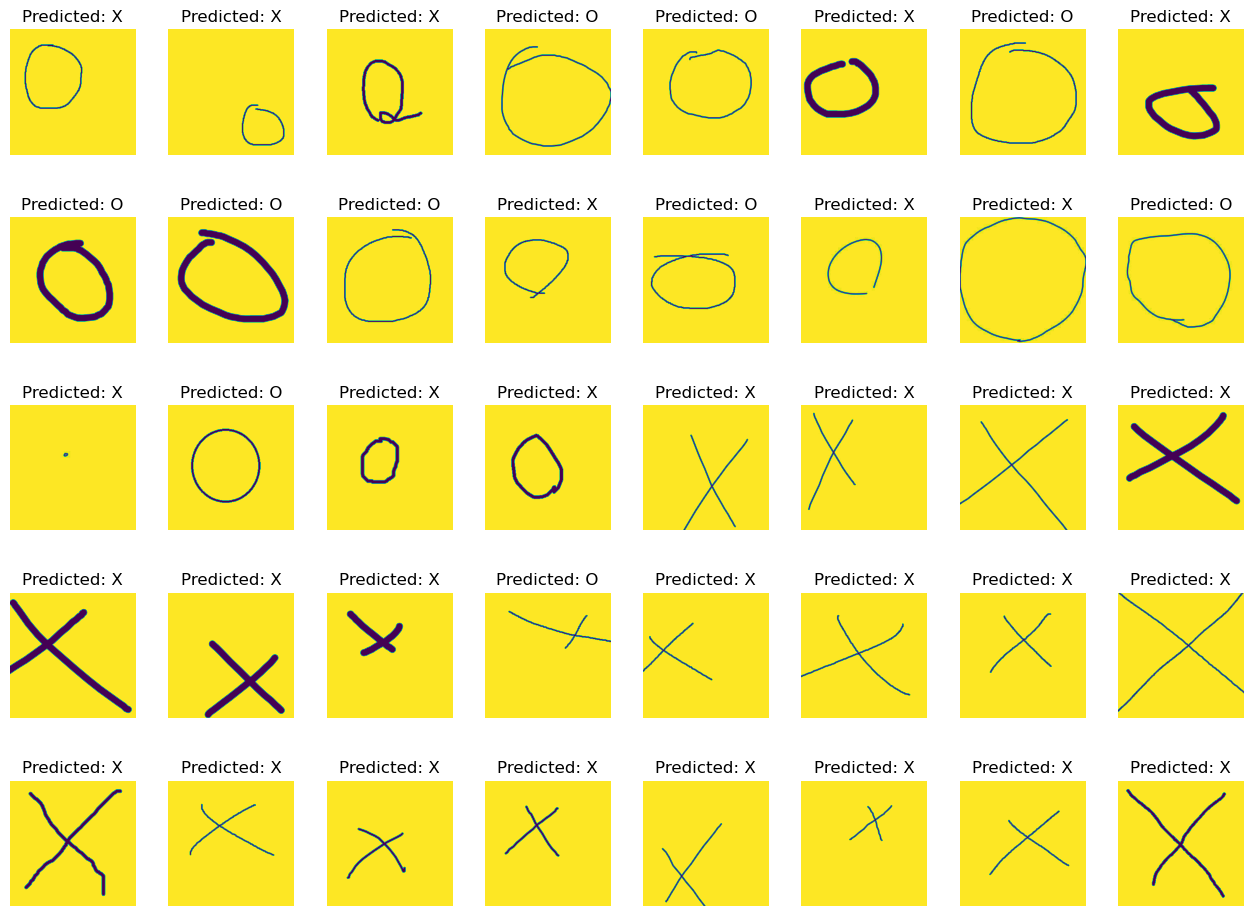

In [182]:
def visualize_predictions(model, test_loader, classes):
    model.eval()  # 모델을 평가 모드로 설정
    fig = plt.figure(figsize=(16, 24))

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            outputs = model(images)  # 모델을 통해 예측
            _, predicted = torch.max(outputs, 1)  # 확률이 가장 높은 클래스 선택

            for i in range(len(images)):
                ax = fig.add_subplot(8, 8, batch_idx * test_loader.batch_size + i + 1)
                ax.set_title(f'Predicted: {classes[predicted[i].item()]}')
                ax.axis('off')
                ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # 이미지를 시각화
                if batch_idx * test_loader.batch_size + i + 1 >= 64:
                    break

    plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.5)
    plt.show()

# 예측 클래스 매핑
classes = {0: 'O', 1: 'X'}

# visualize_predictions 함수를 호출하여 시각화
visualize_predictions(model, test_loader, classes)

In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold = KFold(n_splits=5)

In [185]:
# 훈련 함수 정의
def train(epoch):
    model.train()
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

In [186]:
# 테스트 함수 정의
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

C:\Users\tkdql\AppData\Local\Temp\ipykernel_17852\2317492781.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
C:\Users\tkdql\AppData\Local\Temp\ipykernel_17852\2317492781.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))


Epoch [1/10], Loss: 2.7237130403518677
Epoch [2/10], Loss: 3.2988378504912057
Epoch [3/10], Loss: 3.8187895137816668
Epoch [4/10], Loss: 4.431989947954814
Epoch [5/10], Loss: 2.837974819044272
Epoch [6/10], Loss: 2.738391508658727
Epoch [7/10], Loss: 4.0461296538511915
Epoch [8/10], Loss: 5.612123390038808
Epoch [9/10], Loss: 8.518163760503134
Epoch [10/10], Loss: 14.803425629933676


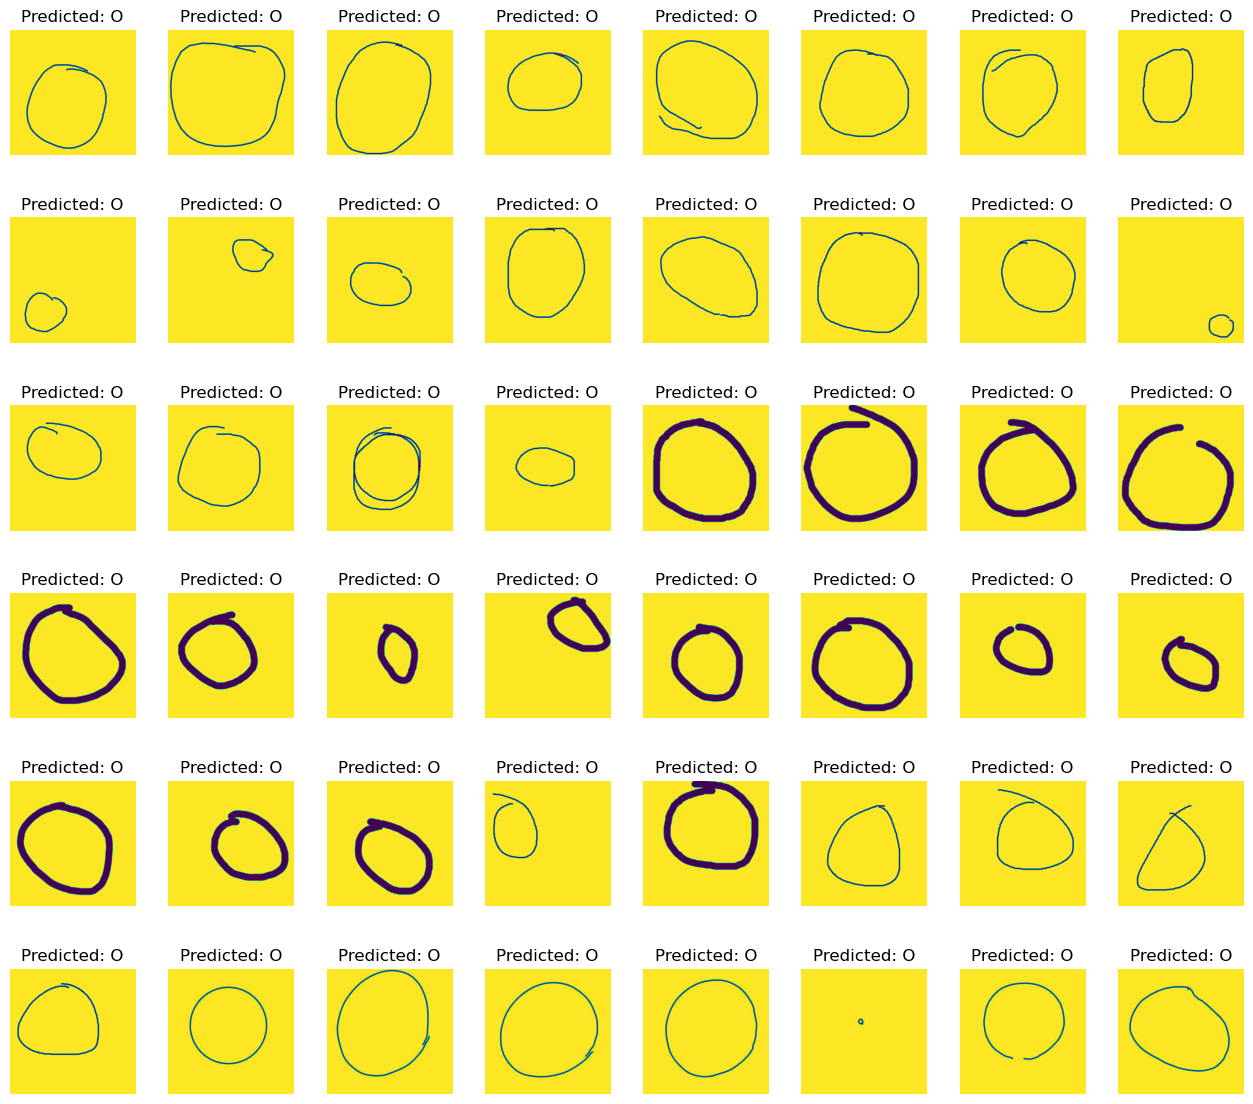

Epoch [1/10], Loss: 64.53054519494374
Epoch [2/10], Loss: 79.7875296274821
Epoch [3/10], Loss: 71.70817852020264
Epoch [4/10], Loss: 390.10813395182294
Epoch [5/10], Loss: 373.785151163737
Epoch [6/10], Loss: 281.73975626627606
Epoch [7/10], Loss: 176.1804542541504
Epoch [8/10], Loss: 155.9119585355123
Epoch [9/10], Loss: 68.97007815043132
Epoch [10/10], Loss: 118.97767957051595


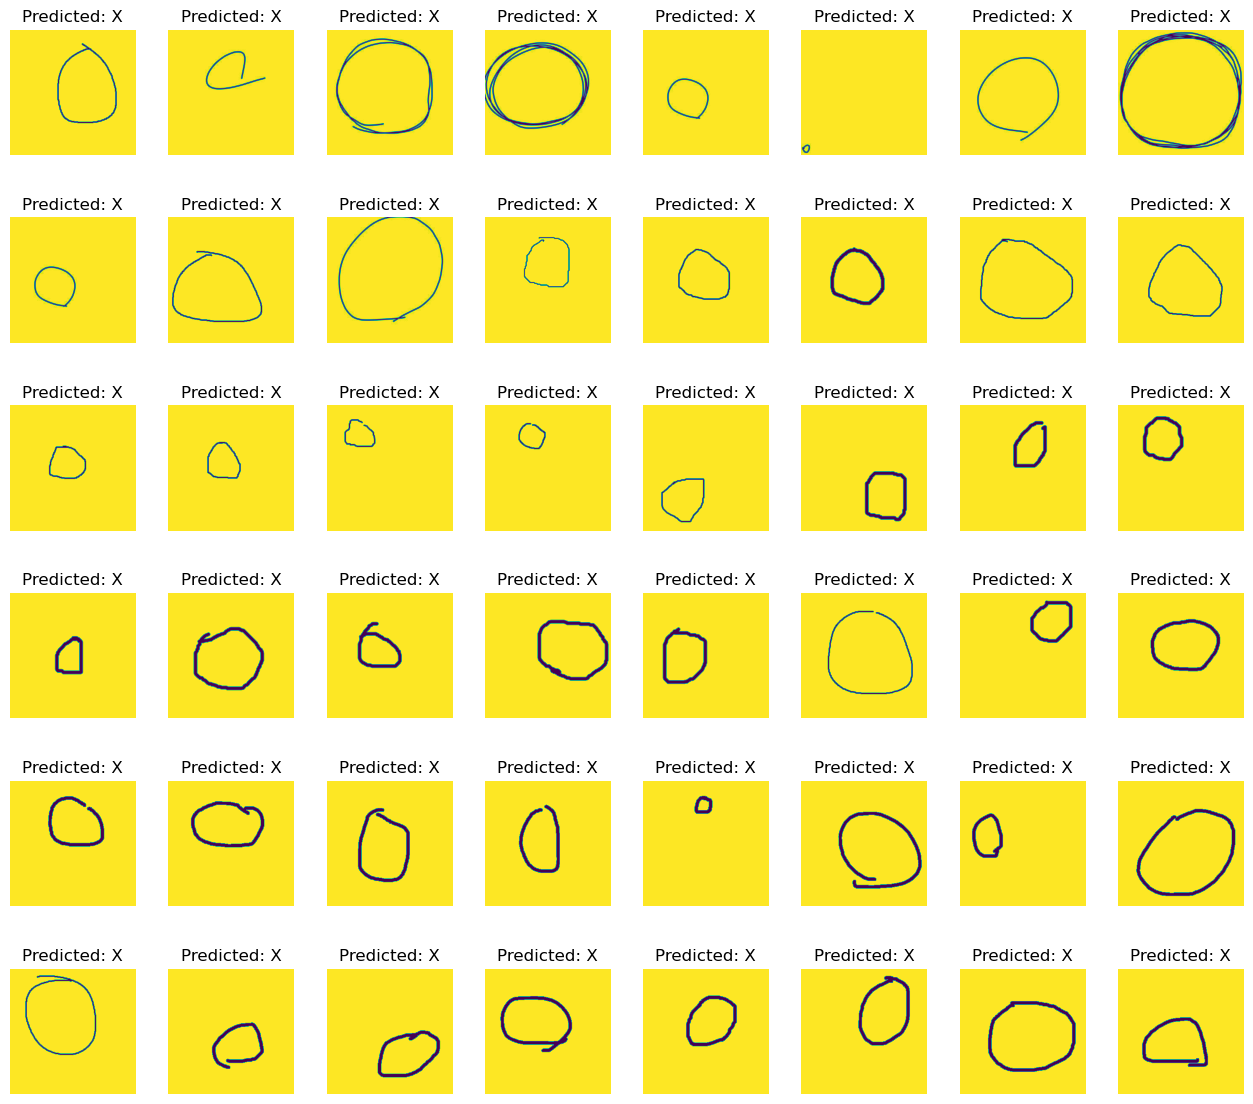

Epoch [1/10], Loss: 34.43299682935079
Epoch [2/10], Loss: 13.79857313632965
Epoch [3/10], Loss: 11.043647448221842
Epoch [4/10], Loss: 9.585502659281095
Epoch [5/10], Loss: 7.541064232587814
Epoch [6/10], Loss: 7.16169395049413
Epoch [7/10], Loss: 7.831450621287028
Epoch [8/10], Loss: 7.840673396984736
Epoch [9/10], Loss: 2.5591349800427756
Epoch [10/10], Loss: 3.8078083197275796


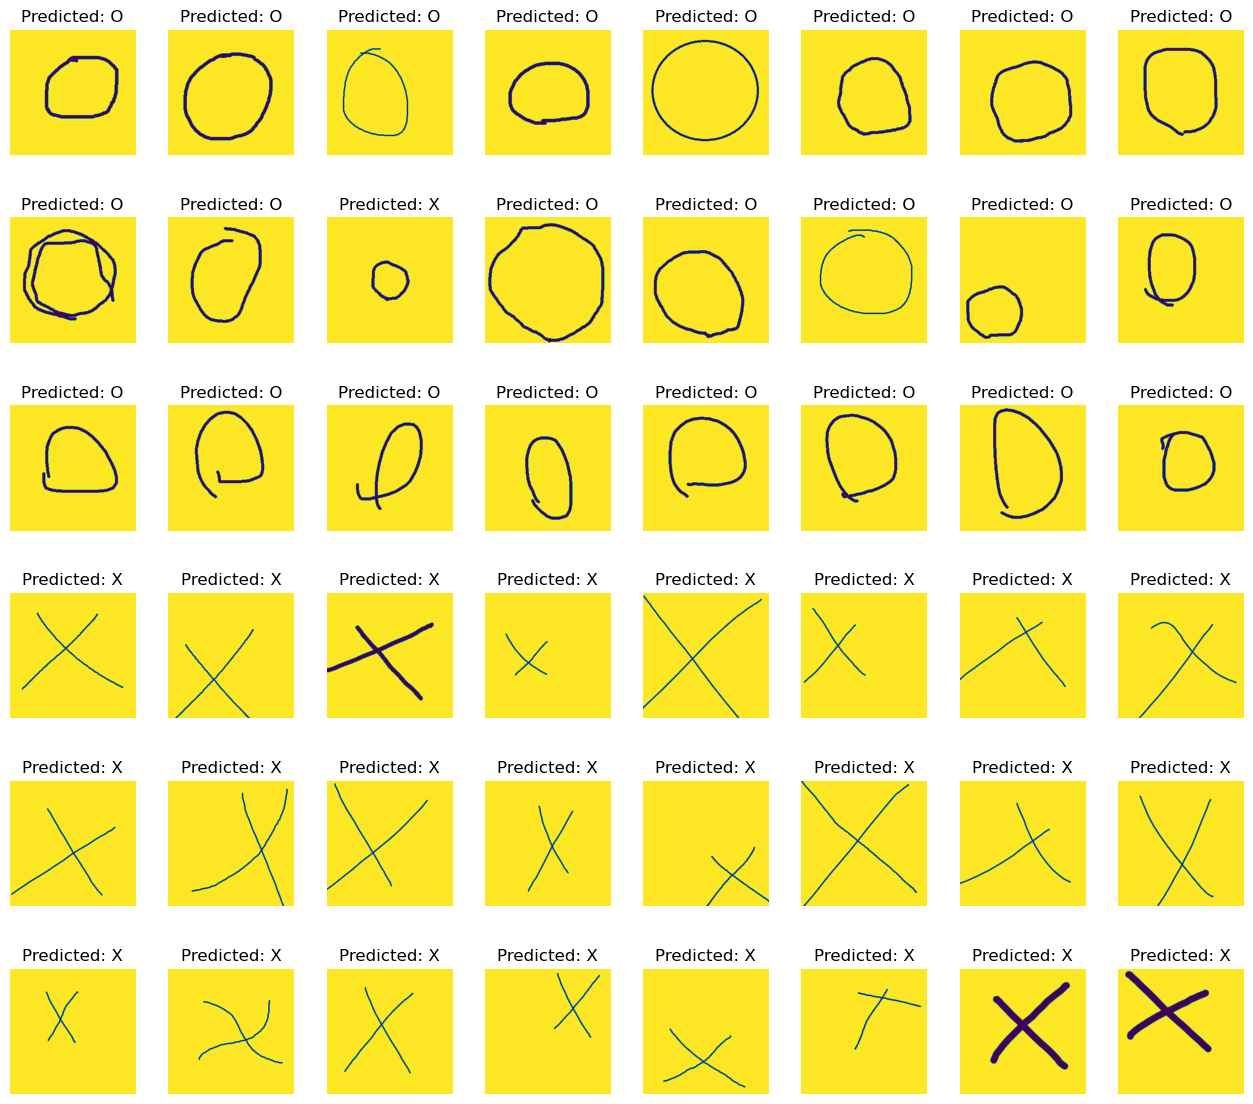

Epoch [1/10], Loss: 2.273154986401399
Epoch [2/10], Loss: 0.8232029477755228
Epoch [3/10], Loss: 2.2788919111092887
Epoch [4/10], Loss: 1.9188496669133503
Epoch [5/10], Loss: 1.053670659661293
Epoch [6/10], Loss: 0.653717098136743
Epoch [7/10], Loss: 1.191207490240534
Epoch [8/10], Loss: 0.9065921405951182
Epoch [9/10], Loss: 1.2541199425856273
Epoch [10/10], Loss: 1.632682481314987


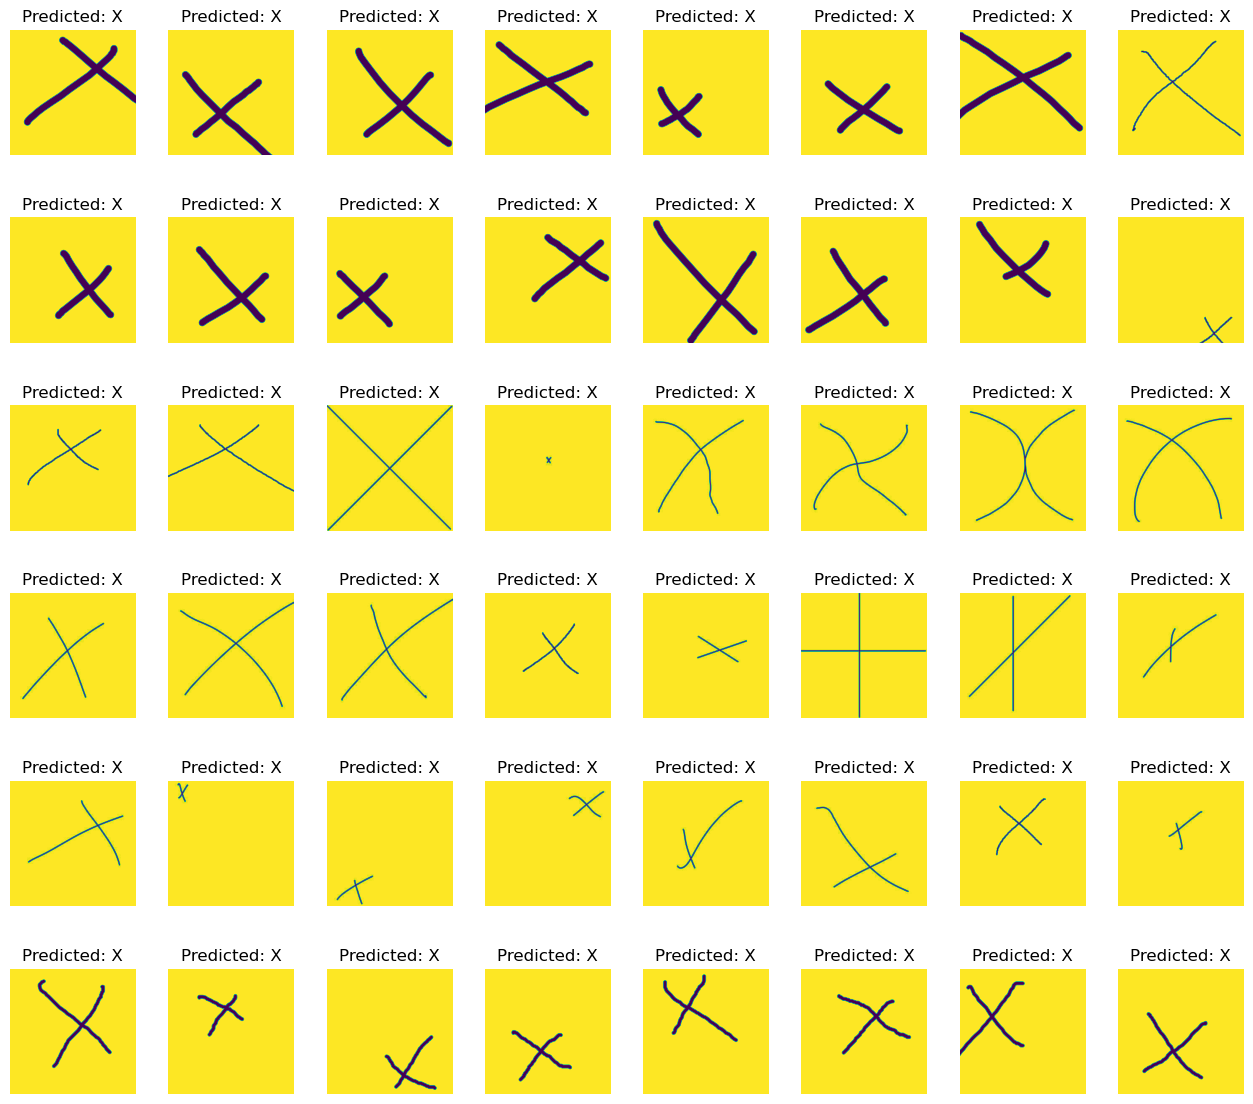

Epoch [1/10], Loss: 1.5116317123174667
Epoch [2/10], Loss: 2.9867003162701926
Epoch [3/10], Loss: 1.8234497755765915
Epoch [4/10], Loss: 1.9597779164711635
Epoch [5/10], Loss: 1.3985265841086705
Epoch [6/10], Loss: 2.3706312775611877
Epoch [7/10], Loss: 0.6305109659830729
Epoch [8/10], Loss: 0.46260814865430194
Epoch [9/10], Loss: 1.0641932835181553
Epoch [10/10], Loss: 0.4932529255747795


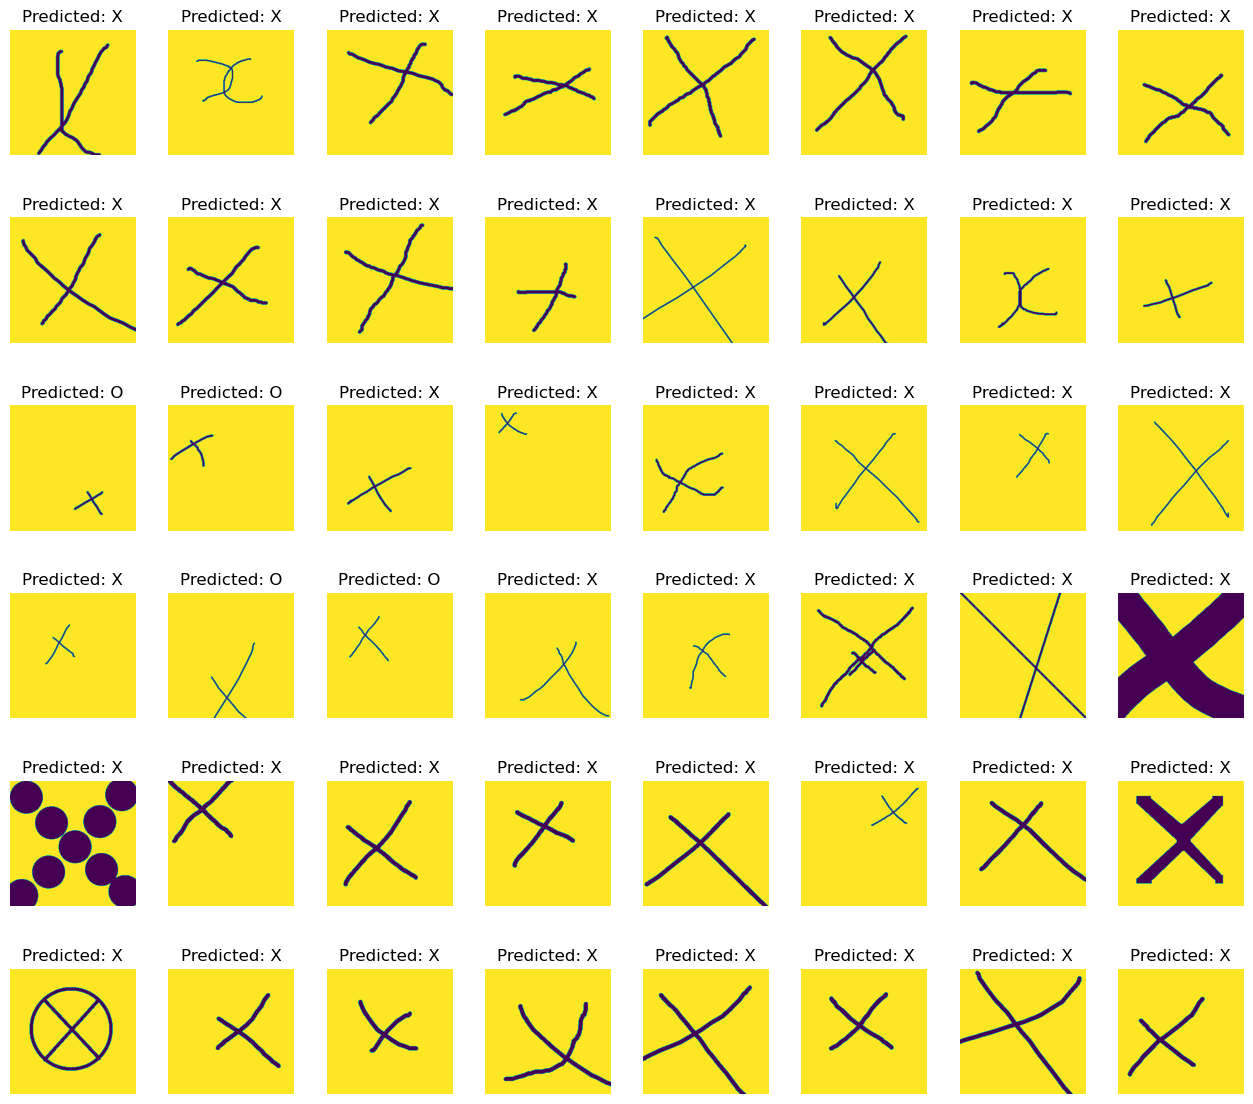

In [187]:
# 훈련 및 테스트 실행
num_epochs = 10

for train_index, test_index in kfold.split(X_train, y_train):
    # kfold.split()으로 반환된 인덱스를 활용하여 train용, test용 데이터 추출
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # TensorDataset 및 DataLoader 생성
    train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
    test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    for epoch in range(num_epochs):
        train(epoch)
    visualize_predictions(model, test_loader, classes)

In [188]:
print(X_train_fold.shape)
print(y_train_fold.shape)
print(X_test_fold.shape)
print(y_test_fold.shape)

torch.Size([192, 1, 300, 300])
torch.Size([192])
torch.Size([48, 1, 300, 300])
torch.Size([48])


# ------------여기부터 CNN---------------------

In [17]:
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
learning_rate = 0.001
training_epochs = 10

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 1*300*300 -> 32*150*150
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # 32*150*150 -> 64*75*75
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(64*75*75, 256)

        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        # x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [20]:
def train(epoch):
    for epoch in range(training_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    
        print(f'Epoch [{epoch + 1}/{training_epochs}], Loss: {running_loss / len(train_loader):.4f}')
    
    print('Finished Training')

In [24]:
# 모델 생성
model = CNN()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train(training_epochs)

Epoch [1/10], Loss: 15416.9484
Epoch [2/10], Loss: 495.8862
Epoch [3/10], Loss: 7.3381
Epoch [4/10], Loss: 1.3256
Epoch [5/10], Loss: 0.3868
Epoch [6/10], Loss: 0.0074
Epoch [7/10], Loss: 0.0115
Epoch [8/10], Loss: 0.0131
Epoch [9/10], Loss: 0.0120
Epoch [10/10], Loss: 0.0105
Finished Training


In [25]:
# 모델 예측
with torch.no_grad():
    prediction = model(X_test.float())  # X_test를 float으로 변환하여 모델에 입력
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print(f'Prediction Accuracy: {accuracy.item() * 100}%')

Prediction Accuracy: 75.0%


In [26]:
def visualize_predictions(model, test_loader, classes):
    model.eval()  # 모델을 평가 모드로 설정
    fig = plt.figure(figsize=(16, 24))

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            outputs = model(images)  # 모델을 통해 예측
            _, predicted = torch.max(outputs, 1)  # 확률이 가장 높은 클래스 선택

            for i in range(len(images)):
                ax = fig.add_subplot(8, 8, batch_idx * test_loader.batch_size + i + 1)
                ax.set_title(f'Predicted: {classes[predicted[i].item()]}')
                ax.axis('off')
                ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # 이미지를 시각화
                if batch_idx * test_loader.batch_size + i + 1 >= 64:
                    break

    plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.5)
    plt.show()

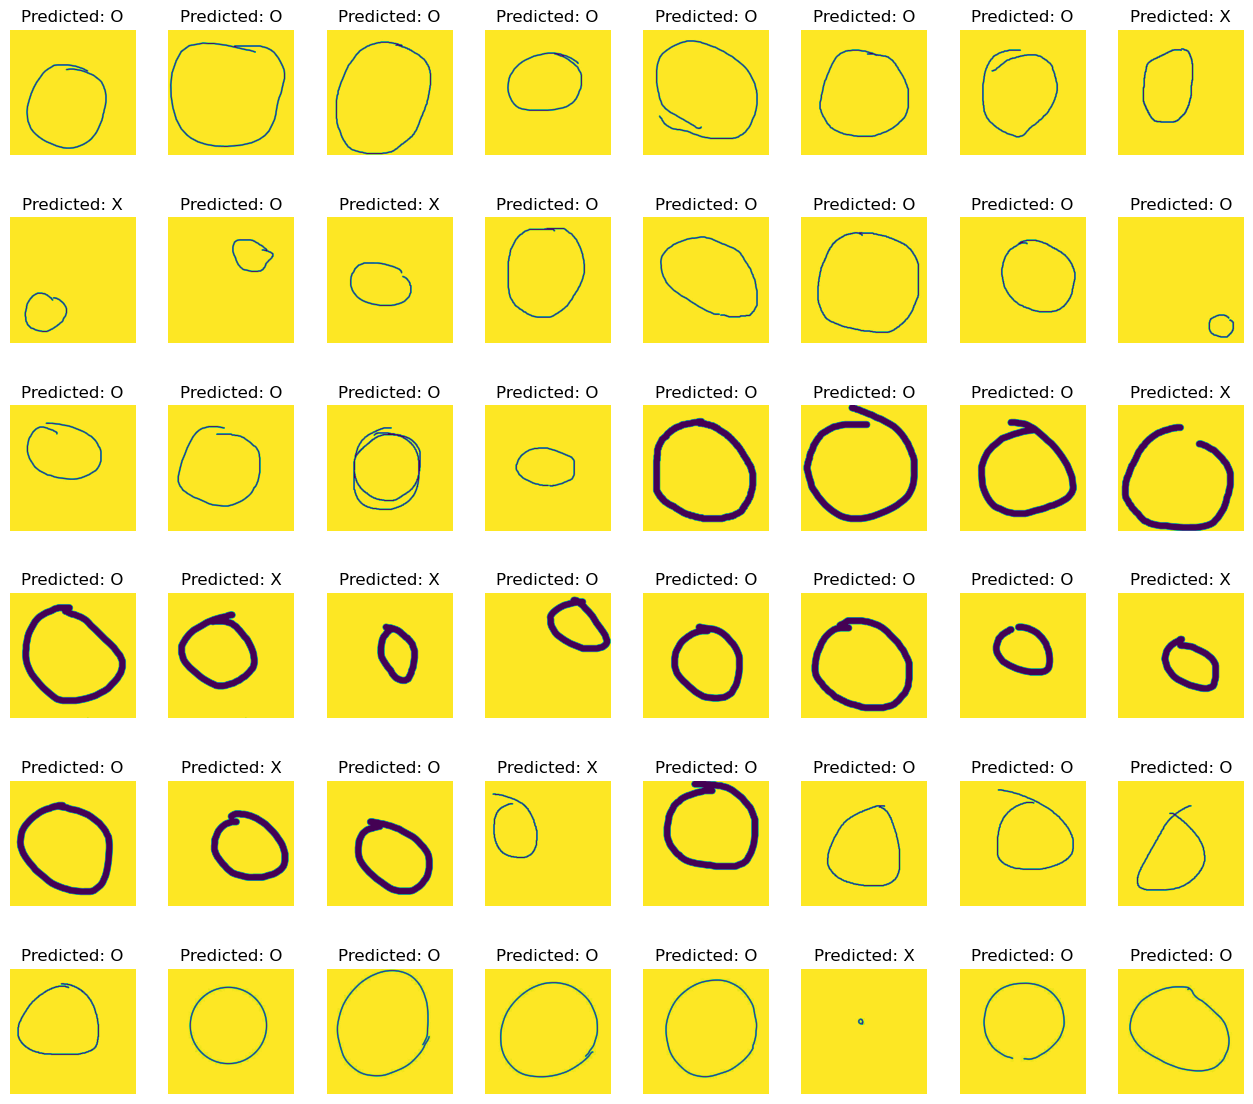

In [27]:
# 예측 클래스 매핑
classes = {0: 'O', 1: 'X'}

# visualize_predictions 함수를 호출하여 시각화
visualize_predictions(model, test_loader, classes)

In [23]:
# 훈련 및 테스트 실행
model = CNN()
num_epochs = 10

for train_index, test_index in kfold.split(X_train, y_train):
    # kfold.split()으로 반환된 인덱스를 활용하여 train용, test용 데이터 추출
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # TensorDataset 및 DataLoader 생성
    train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
    test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    for epoch in range(num_epochs):
        train(epoch)
    visualize_predictions(model, test_loader, classes)

C:\Users\tkdql\AppData\Local\Temp\ipykernel_29612\2821130230.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X_train_fold), torch.tensor(y_train_fold))
C:\Users\tkdql\AppData\Local\Temp\ipykernel_29612\2821130230.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(X_test_fold), torch.tensor(y_test_fold))


Epoch [1/10], Loss: 1.6689
Epoch [2/10], Loss: 1.6689


KeyboardInterrupt: 